# Data mining - Introdução à Análise Exploratória de Dados
___
## Mushroom Classification

![mushroom](https://images6.alphacoders.com/436/436376.jpg)

Esse notebook utiliza técnicas de análise exploratória de dados([AED](https://pt.wikipedia.org/wiki/An%C3%A1lise_explorat%C3%B3ria_de_dados)), primeira etapa no processo de análise de dados.

Utilizaremos a base de dados [mushroom classification: safe to eat or deadly poison?](https://www.kaggle.com/uciml/mushroom-classification), livremente disponível na plataforma [Kaggle](https://www.kaggle.com/).   

O processo está divido de acordo com as seguintes etapas:

1. [Importação e carregamento da base de dados](#01)
2. [Visualização da base de dados](#02)
3. [Estatísticas](#03)
4. [Gráficos](#04)
5. [Árvore de decisão](#05)

## Importação e carregamento da base de dados  

Nesse estudo de caso, a base de dados está disponível em um arquivo `.xlsx` (Excel).   

Para carregarmos esse arquivo, será necessário utilizarmos o método `read_excel()` da biblioteca `pandas`.   

Esse método possui parâmetros semelhantes ao `read_csv`, utilizado no exercício anterior, quando trabalhamos com o dataset __Iris__. 

<div class="alert alert-block alert-info">
<b>Dica:</b> Nesse exemplo, o arquivo .xlsx está na mesma pasta do arquivo do jupyter nootebook. Se os arquivos estivessem em pastas diferentes, seria necessário informar entre aspas - duplas ou simples -, o caminho completo do arquivo.
</div>

<div class="alert alert-block alert-warning">
<b>Observação:</b> Pode ser necessário instalar uma dependência para suporte a arquivos Excel: xlrd. 
</div>

In [30]:
# Caso seja necessário instalar a dependência xlrd, descomente a linha abaixo e execute essa célula.
# !pip install xlrd

In [31]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para utilização de gráficos
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [32]:
# Carrega a base de dados
mushrooms = pd.read_excel('mushrooms.xlsx')

A biblioteca `pandas` utiliza uma estrutura de dados tabulados, denominada `DataFrame`, para armazenar os dados contidos no arquivo Excel.

Acima, esses dados foram carregados em um `DataFrame` e, por sua vez, essa estrutura foi atribuída à variável `mushrooms`.

O método `type()` permite verificar qual o tipo da estrutura armazenada nessa variável.

In [33]:
type(mushrooms)

pandas.core.frame.DataFrame

<div class="alert alert-block alert-info">
<b>Dica:</b> A função type() pemite verificar o tipo de qualquer objeto em Python.
</div>

## Visualização da base de dados

O atributo `shape` permite identificar as dimensões, a quantidade de linhas e colunas da base de dados. 

In [34]:
mushrooms.shape

(5936, 22)

Como a maioria das bases de dados possui uma grande quantidade de linhas, podemos utilizar o método `head()`, que exibe apenas suas cinco primeiras linhas; ou `tail()`, que exibe as cinco últimas. 

In [35]:
mushrooms.head()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
0,BELL,SCALY,BUFF,BRUISES,NONE,FREE,CLOSE,BROAD,WHITE,ENLARGING,...,SMOOTH,WHITE,WHITE,WHITE,TWO,PENDANT,GREEN,SEVERAL,GRASSES,POISONOUS
1,CONVEX,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
2,FLAT,SMOOTH,WHITE,NO,NONE,FREE,CROWDED,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,EVANESCENT,BLACK,ABUNDANT,GRASSES,EDIBLE
3,CONVEX,FIBROUS,BROWN,NO,NONE,FREE,CLOSE,NARROW,BLACK,ENLARGING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SOLITARY,URBAN,EDIBLE
4,FLAT,FIBROUS,BROWN,BRUISES,NONE,FREE,CLOSE,BROAD,BROWN,TAPERING,...,SMOOTH,WHITE,PINK,WHITE,ONE,PENDANT,BROWN,SOLITARY,WOODS,EDIBLE


## Estatísticas
Em princípio, todas as variáveis do dataset são categóricas.

Podemos verificar rapidamente essa informação utilizando o método `info()`.

In [36]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 22 columns):
cap.shape                   5936 non-null object
cap.surface                 5936 non-null object
cap.color                   5936 non-null object
bruises                     5936 non-null object
odor                        5936 non-null object
gill.attachment             5936 non-null object
gill.spacing                5936 non-null object
gill.size                   5936 non-null object
gill.color                  5936 non-null object
stalk.shape                 5936 non-null object
stalk.root                  5936 non-null object
stalk.surface.above.ring    5936 non-null object
stalk.surface.below.ring    5936 non-null object
stalk.color.above.ring      5936 non-null object
stalk.color.below.ring      5936 non-null object
veil.color                  5936 non-null object
ring.number                 5936 non-null object
ring.type                   5936 non-null object
spore.print

Dessa forma, confirmamos que o `pandas` interpreta todas as variáveis do dataset como categóricas; ou melhor, como `object`, que é uma definição genérica para variáveis não numéricas.

Podemos explicitar que essas variáveis devem ser interpretadas como categóricas. Uma das vantagens dessa especificação seria o menor consumo de memória e, por consequência, ganho de performace na execução do código.

Como todas as variáveis do dataset são categóricas, um modo simples de dizer ao `pandas` que as variáveis devem ser interpretadas daquela forma, seria utilizando o parâmetro `dtype` no carregamento da base de dados.

In [37]:
# Carrega a base de dados, definido o tipo das variáveis como categóricas
mushrooms = pd.read_excel('mushrooms.xlsx', dtype='category')

In [38]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 22 columns):
cap.shape                   5936 non-null category
cap.surface                 5936 non-null category
cap.color                   5936 non-null category
bruises                     5936 non-null category
odor                        5936 non-null category
gill.attachment             5936 non-null category
gill.spacing                5936 non-null category
gill.size                   5936 non-null category
gill.color                  5936 non-null category
stalk.shape                 5936 non-null category
stalk.root                  5936 non-null category
stalk.surface.above.ring    5936 non-null category
stalk.surface.below.ring    5936 non-null category
stalk.color.above.ring      5936 non-null category
stalk.color.below.ring      5936 non-null category
veil.color                  5936 non-null category
ring.number                 5936 non-null category
ring.type                 

Observamos, assim, na última coluna acima, todas as variáveis do dataset devidamente "tipadas" como categóricas.

<div class="alert alert-block alert-info">
<b>Dica:</b> Podemos verificar a funcionalidade de objetos em Python por meio da função help().
</div>

In [39]:
# Descomente a linha abaixo e execute essa célula caso queira compreender detalhadamente o método read_excel
# help(pd.read_excel)

O método `describe()` exibe algumas medidas estatíticas.   

Para variáveis categóricas, esse método exibe as seguintes medidas:  

* count - Quantidade de observações contidas na coluna;
* unique - Número de observações distindas;
* top - Observação que possui maior frequência;
* freq - Frequência da observação _top_.

In [40]:
mushrooms.describe()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.,class
count,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936,...,5936,5936,5936,5936,5936,5936,5936,5936,5936,5936
unique,6,4,8,2,7,2,2,2,9,2,...,4,7,7,2,3,4,6,6,6,2
top,CONVEX,FIBROUS,GRAY,BRUISES,NONE,FREE,CLOSE,BROAD,PINK,TAPERING,...,SMOOTH,WHITE,WHITE,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
freq,2980,2300,1952,3184,3056,5912,4632,5208,1448,3136,...,3684,3416,3344,5928,5768,3488,2048,2184,2504,3768


O código abaixo verifica o balanceamento de cada uma das variáveis(colunas), de acordo com seus elementos únicos.

In [41]:
features = mushrooms.columns.to_list() # cria uma lista contendo o nome das colunas

#Reporta a distribuição de elementos contidos em cada coluna do dataset
for feature in features: 
    print(f'Característica: {feature.replace(".", " ").title()}',          
          mushrooms[feature].value_counts(dropna=False),
          # f'Quantidade de valores distintos: {len(np.unique(mushrooms[feature]))}',
          '-' * 50,
          ' ',
          sep='\n')

Característica: Cap Shape
CONVEX     2980
FLAT       2572
BELL        300
KNOBBED      48
SUNKEN       32
CONICAL       4
Name: cap.shape, dtype: int64
--------------------------------------------------
 
Característica: Cap Surface
FIBROUS    2300
SCALY      2244
SMOOTH     1388
GROOVES       4
Name: cap.surface, dtype: int64
--------------------------------------------------
 
Característica: Cap Color
GRAY        1952
BROWN       1200
YELLOW      1056
WHITE        880
RED          588
BUFF         120
PINK          96
CINNAMON      44
Name: cap.color, dtype: int64
--------------------------------------------------
 
Característica: Bruises
BRUISES    3184
NO         2752
Name: bruises, dtype: int64
--------------------------------------------------
 
Característica: Odor
NONE        3056
FOUL        1584
ANISE        400
ALMOND       400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: odor, dtype: int64
--------------------------------------------------
 
Característica: Gi

## Gráficos

Utilizaremos nessa sessão o __gráfico de barras__, um dos mais indicados para  dados categóricos.

Plotaremos os gráficos referentes as seguintes variáveis do dataset:

* odor;
* veil.color;
* stalk.shape;
* class.

O Python possui inúmeras bibliotecas gráficas. Utilizaremos as mais conhecidas: [matplotib](https://matplotlib.org/) e [seaborn](https://seaborn.pydata.org/index.html).

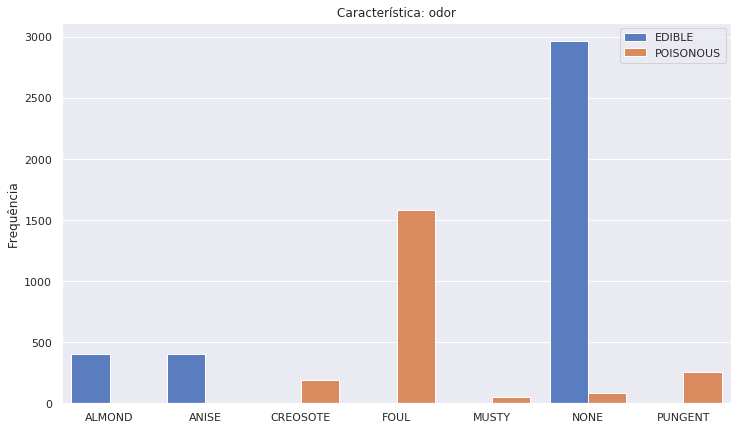

In [42]:
sns.set()

# Gráfico de barras: odor
fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(         
    x='odor',                   
    data=mushrooms,   
    hue='class', 
    # dodge=False, 
    palette='muted', 
    )

ax.set(
    xlabel=None,
    ylabel='Frequência',
    title='Característica: odor'
       )

ax.legend(loc='best').set_title(None)

plt.show()

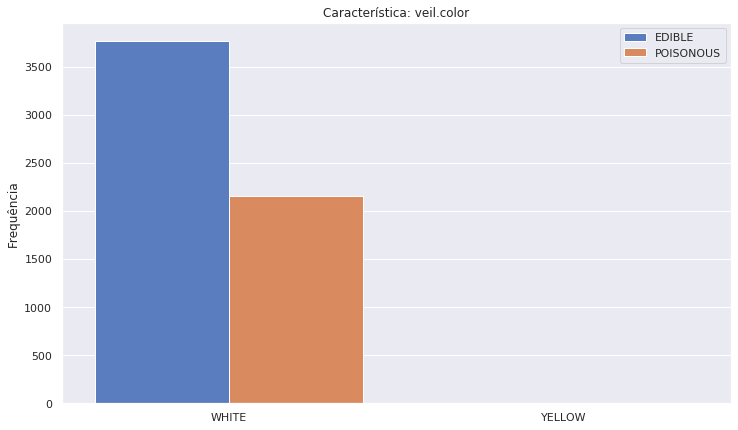

In [43]:
# Gráfico de barras: veil.color
fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(         
    x='veil.color',                   
    data=mushrooms,   
    hue='class', 
    # dodge=False, 
    palette='muted', 
    )

ax.set(
    xlabel=None,
    ylabel='Frequência',
    title='Característica: veil.color'
       )

ax.legend(loc='best').set_title(None)

plt.show()

Diferentemente do observado no RapidMiner e R, somente por meio desse gráfico não conseguimos visualizar a presença de observaçãos de cor amarelo.

Apesar desse atributo possuir apenas duas variáveis (branca e amarela), Há uma diferença significativa entre suas frequências. E a cor amarela representa apenas 1(um) por cento desses valores.

In [44]:
mushrooms['veil.color'].value_counts(dropna=False, normalize=True)

WHITE     0.998652
YELLOW    0.001348
Name: veil.color, dtype: float64

Uma forma de compararmos variáveis com diferenças significativas de escala, seria utlizando a escala __logarítmica__.

Faremos uma pequena alteração no código acima, modificando a escala das frequências para __logarítmica__. Dessa forma, poderemos visualizar os dados da cor amarela.

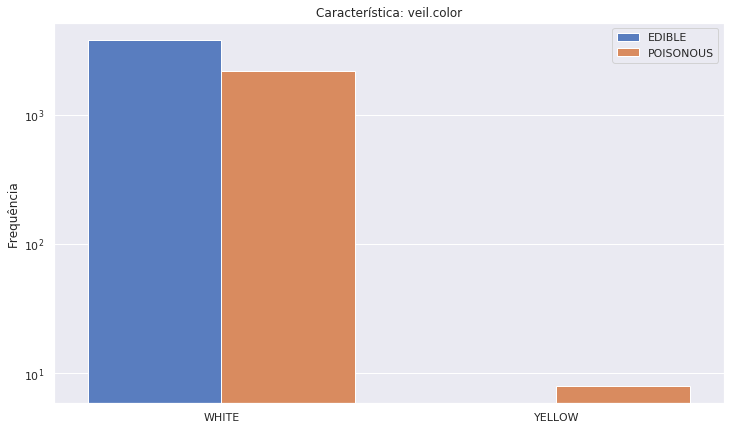

In [45]:
# Gráfico de barras: veil.color, escala logarítmica 
fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(         
    x='veil.color',                   
    data=mushrooms,   
    hue='class', 
    # dodge=False, 
    palette='muted', 
    )

ax.set(
    xlabel=None,
    ylabel='Frequência',
    yscale='log', # define a escala utilizada para a ordenada
    title='Característica: veil.color'
       )

ax.legend(loc='best').set_title(None)

plt.show()

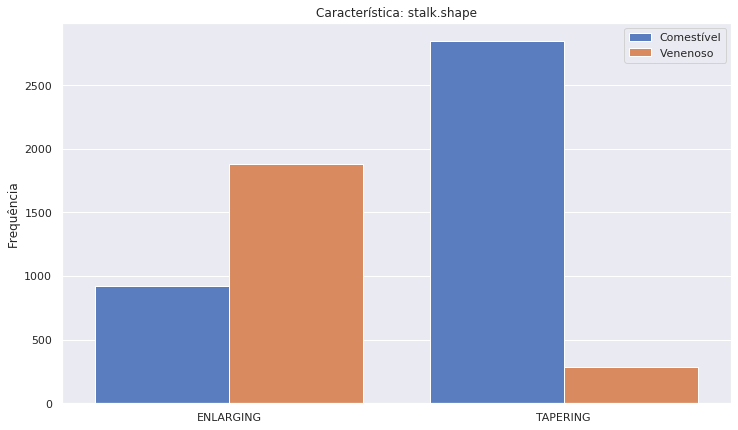

In [46]:
# Gráfico de barras: stalk.shape
fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(         
    x='stalk.shape',                   
    data=mushrooms,   
    hue='class', 
    # dodge=False, 
    palette='muted', 
    )

ax.set(
    xlabel=None,
    ylabel='Frequência',
    title='Característica: stalk.shape'
       )

ax.legend(loc='best', labels=['Comestível', 'Venenoso']).set_title(None)

plt.show()

In [47]:
# Balanceamento da classe
mushrooms['class'].value_counts(dropna=False, normalize=True)

EDIBLE       0.634771
POISONOUS    0.365229
Name: class, dtype: float64

## Árvore de decisão

In [48]:
# Biblioteca para geração de gráficos
import graphviz

# Biblioteca para transformação de variáveis categóricas em numéricas
from category_encoders.target_encoder import TargetEncoder

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report)

In [49]:
# Descomente a linha abaixo e execute essa célula caso seja necessário instalar a biblioteca graphviz
# !pip install graphviz

In [50]:
# Descomente a linha abaixo e execute essa célula caso seja necessário instalar a biblioteca category_encoders
# !pip install category_encoders

In [51]:
# Separa os dados previsores dos de classe
X = mushrooms.drop('class', axis=1) 
y = mushrooms['class']              

Em Python é necessário que as variáveis utilizadas nos modelos de machine learning sejam numéricas.

Logo, será preciso transformar as variáveis categóricas do dataset em variáveis numéricas. 

Com a finalidade de preservar as colunas do dataset, utilizaremos um método conhecido por [Target Encoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html).

In [52]:
X = TargetEncoder().fit_transform(X, y.replace({'POISONOUS': 1, 'EDIBLE': 0}))
X.head()

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat.
0,0.133333,0.388592,1.000000,0.195980,0.028796,0.362652,0.443869,0.327189,0.220884,0.671429,...,0.173375,0.18241,0.238876,0.244019,0.364372,0.600000,0.233945,1.000000,0.498168,0.349716
1,0.378523,0.394813,0.363636,0.561047,0.028796,0.362652,0.085890,0.327189,0.106870,0.091837,...,0.208092,0.18241,0.238876,0.244019,0.364372,0.355062,0.007246,0.112000,0.000000,0.349716
2,0.379471,0.394813,0.363636,0.561047,0.028796,0.362652,0.085890,0.327189,0.106870,0.091837,...,0.208092,0.18241,0.238876,0.244019,0.364372,0.355062,0.007246,0.112000,0.000000,0.349716
3,0.378523,0.323478,0.126667,0.561047,0.028796,0.362652,0.443869,0.637363,0.135593,0.671429,...,0.173375,0.18241,0.238876,0.244019,0.364372,0.355062,0.233945,0.109375,0.383886,0.739130
4,0.379471,0.323478,0.126667,0.195980,0.028796,0.362652,0.443869,0.327189,0.106870,0.091837,...,0.173375,0.18241,0.238876,0.428571,0.364372,0.355062,0.233945,0.109375,0.383886,0.268371


Por meio do método __Target Encoder__, todas as variáveis do dataset foram transformadas em variáveis numéricas, preservando suas dimensões, o rótulo das colunas.

In [53]:
# Separa a base de dados entre treino e teste: 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    random_state=0, # semente para pseudo-aleatoriedade e 
                    # reprodução de resultaos  
    stratify=y # utilizado para balancear as bases de treino
               # e teste de acordo com a classe
    )

# Verifica as dimensões do dataset original e das divisões criadas
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5936, 21), (5936,), (4155, 21), (1781, 21), (4155,), (1781,))

In [54]:
# Árvore de decisão
model = DecisionTreeClassifier(random_state=0) # instancia o modelo de 
                                               # classificação
model.fit(X_train, y_train) # treina o modelo
y_pred = model.predict(X_test) # utiliza o modelo treinado para realizar
                               # previsões sobre uma base desconhecida 

accuracy = accuracy_score(y_test, y_pred) # verifica a acurácia do modelo

print(f'Acurária obtida por meio do modelo Árvore de Decisão: {accuracy:.2%}')

Acurária obtida por meio do modelo Árvore de Decisão: 100.00%


In [55]:
# Matriz de confusão
pd.crosstab(
    y_pred,
    y_test,
    rownames=['Previsto'],
    colnames=['Real'],
    margins=True,
    # normalize=True, 
    dropna=False,
    )

Real,EDIBLE,POISONOUS,All
Previsto,,,
EDIBLE,1131,0,1131
POISONOUS,0,650,650
All,1131,650,1781


In [56]:
# Relatório de classificação
print(classification_report(y_test, y_pred,
                            target_names=['Comestível', 'Venenoso']))

              precision    recall  f1-score   support

  Comestível       1.00      1.00      1.00      1131
    Venenoso       1.00      1.00      1.00       650

    accuracy                           1.00      1781
   macro avg       1.00      1.00      1.00      1781
weighted avg       1.00      1.00      1.00      1781



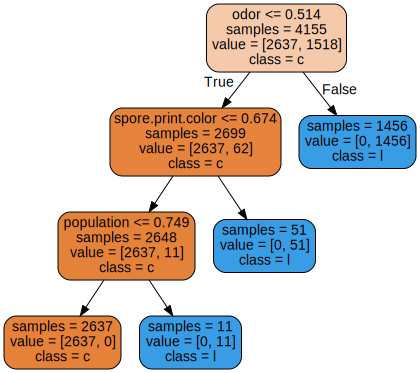

In [57]:
# Plot da Árvore de Decisão
feature_names = X.columns.to_list() # lista contendo o nome dos atributos

dot_data = export_graphviz(
    decision_tree=model,
    out_file=None,
    feature_names=feature_names,
    impurity=False,        
    class_names='class',
    filled=True,
    rounded=True,    
) 

graphviz.Source(dot_data)